# Employee Attrition

The data is for company X, which is trying to control Attrition. There are two sets of Data, 'existing employees' and 'employees who have left'. The following attributes are available for every employee:

 * Satisfaction level
 * Last evaluation
 * Number of project
 * Average monthly hours
 * Time spent at the company
 * Whether they have had a work accident
 * Whethere they have had promotion in the last 5 years
 * Departments (column sales)
 * Salary
 * Whether the employee has left

 # Objective
 * What type of employees are leaving
 * Determne which employees are prone to leave next
 * Present your result in the presentation sheet presentation area

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='ticks')

# Import ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, GridSearchCV

#from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score




In [2]:
# Load Data Set
Ext_Emp = pd.read_excel(r"C:\Users\Apple\Downloads\Employee_Attrition.xlsx", 'Existing employees',)
Depart_Emp = pd.read_excel(r"C:\Users\Apple\Downloads\Employee_Attrition.xlsx",'Employees who have left')

In [47]:
Ext_Emp['Have_Left']=0

In [49]:
Ext_Emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Have_Left
0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,sales,low,0
1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,sales,low,0
2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,sales,low,0
3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,sales,low,0
4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,sales,low,0


In [5]:
Depart_Emp['Have_Left']=1

In [6]:
Depart_Emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Have_Left
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low,1
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium,1
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium,1
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low,1
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low,1


In [7]:
# total number of employee in each table

print('Total number of Ext_Emp', Ext_Emp.shape[0])
print('Total number of Depart_Emp', Depart_Emp.shape[0])

Total number of Ext_Emp 11428
Total number of Depart_Emp 3571


In [8]:
perc_exist=(Ext_Emp.shape[0]/(Ext_Emp.shape[0]+Depart_Emp.shape[0]))*100
perc_Depart=(Depart_Emp.shape[0]/(Ext_Emp.shape[0]+Depart_Emp.shape[0]))*100

In [9]:
perc_exist

76.19174611640777

In [10]:
perc_Depart

23.80825388359224

In [11]:
print ('The percentage of employee remaining {}%, while the percentage of employees who have left is {}')

The percentage of employee remaining {}%, while the percentage of employees who have left is {}


In [12]:
Emp_Att=Ext_Emp.merge(Depart_Emp, how='outer')

In [50]:
Emp_Att

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Have_Left
0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,sales,low,0
1,0.82,0.67,2.0,202.0,3.0,0.0,0.0,sales,low,0
2,0.45,0.69,5.0,193.0,3.0,0.0,0.0,sales,low,0
3,0.78,0.82,5.0,247.0,3.0,0.0,0.0,sales,low,0
4,0.49,0.60,3.0,214.0,2.0,0.0,0.0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,support,low,1
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,support,low,1
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,support,low,1
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,support,low,1


In [13]:
Emp_Att2 = pd.concat([Ext_Emp, Depart_Emp], axis=0)

In [14]:
Emp_Att2

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Have_Left
0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,sales,low,0
1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,sales,low,0
2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,sales,low,0
3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,sales,low,0
4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...,...
3566,14995.0,0.40,0.57,2.0,151.0,3.0,0.0,0.0,support,low,1
3567,14996.0,0.37,0.48,2.0,160.0,3.0,0.0,0.0,support,low,1
3568,14997.0,0.37,0.53,2.0,143.0,3.0,0.0,0.0,support,low,1
3569,14998.0,0.11,0.96,6.0,280.0,4.0,0.0,0.0,support,low,1


In [15]:
Emp_Att.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Have_Left
0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,sales,low,0
1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,sales,low,0
2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,sales,low,0
3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,sales,low,0
4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,sales,low,0


In [16]:
# Dropping Emp ID
Emp_Att.drop('Emp ID', axis = 1, inplace = True)

In [17]:
Emp_Att.shape

(14999, 10)

In [18]:
# check info to know data types
Emp_Att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   Work_accident          14999 non-null  float64
 6   promotion_last_5years  14999 non-null  float64
 7   dept                   14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   Have_Left              14999 non-null  int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 1.3+ MB


 # EDA

In [19]:
# describe the data
Emp_Att.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
Have_Left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0


<AxesSubplot:xlabel='Have_Left', ylabel='Count'>

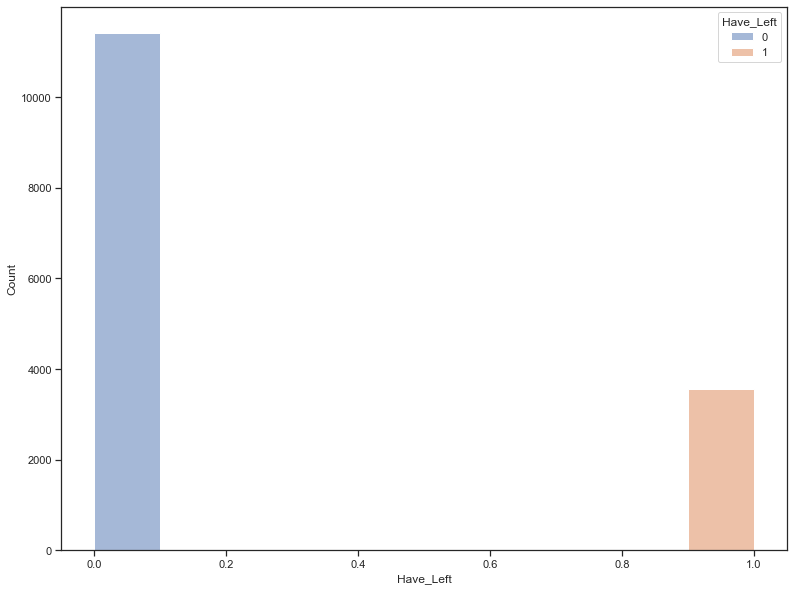

In [20]:
plt.figure(figsize= (13, 10))
sns.histplot(x = 'Have_Left', hue = 'Have_Left', data = Emp_Att, bins = 10)

##Distribution of the Data Set
From the Histogram above it can be seen that the data is imbalanced as empoyees who have left are quite smaller compared to those who are stil with the company 

<AxesSubplot:xlabel='dept', ylabel='Count'>

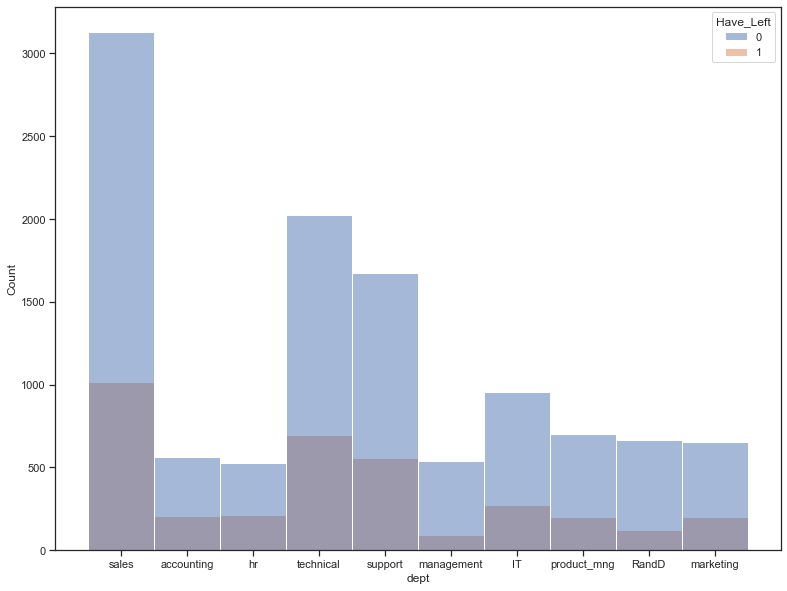

In [21]:
plt.figure(figsize= (13, 10))
sns.histplot(x = 'dept', hue = 'Have_Left', data = Emp_Att, bins = 10)


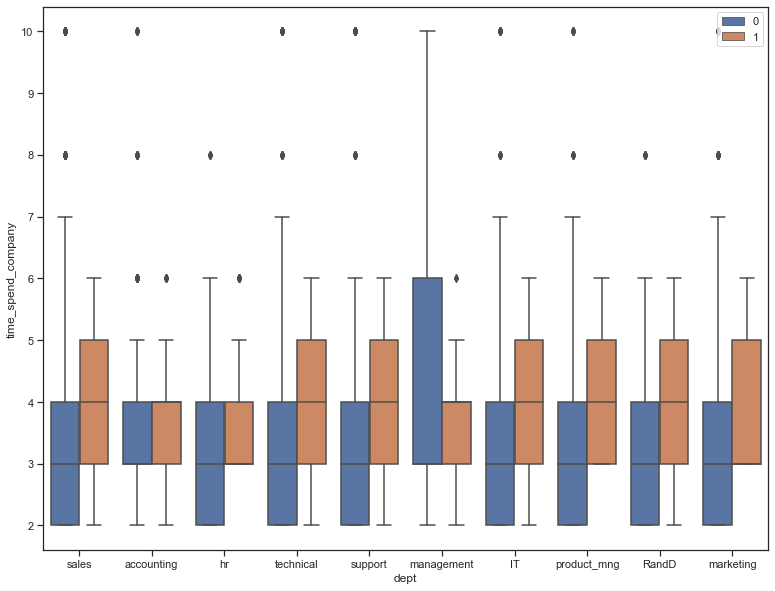

In [22]:
plt.figure(figsize= (13, 10))
sns.boxplot(x = 'dept', y = 'time_spend_company', hue = 'Have_Left', data = Emp_Att,)
plt.legend(loc=1)

C:\PROGRA~1\KMSpico\temp/ipykernel_5328/48104067.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(Emp_Att.corr(), annot=True, mask=np.zeros_like(Emp_Att.corr(),dtype=np.bool), cmap=sns.diverging_palette(220, 10,as_cmap=True))


<AxesSubplot:>

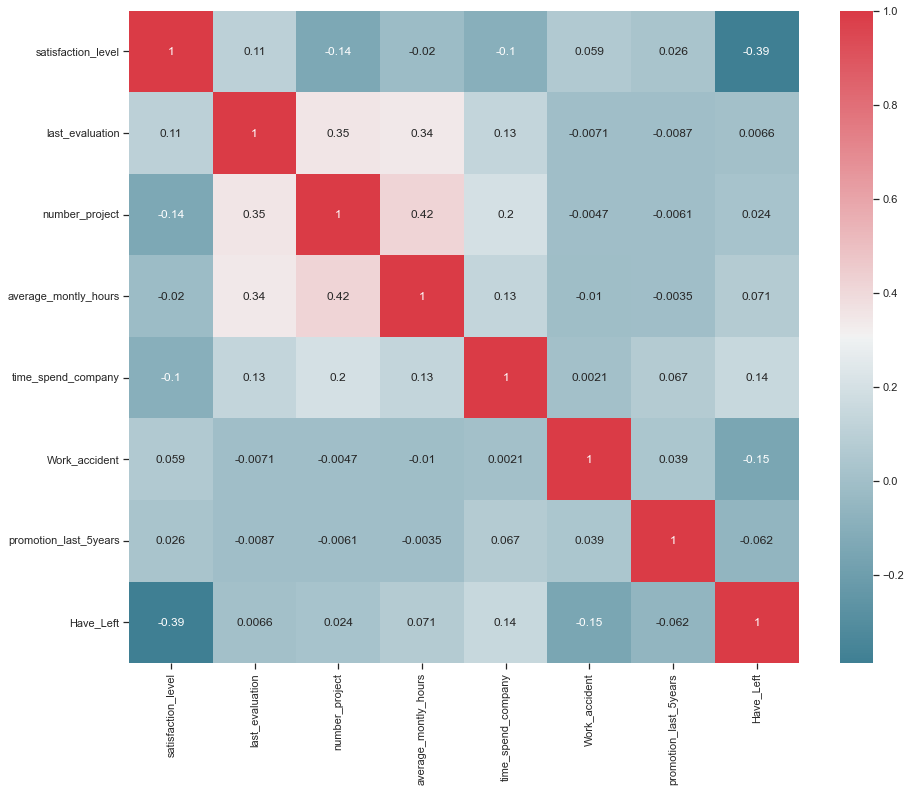

In [23]:
# Correlatiion Plot
plt.figure(figsize= (15, 12))
sns.heatmap(Emp_Att.corr(), annot=True, mask=np.zeros_like(Emp_Att.corr(),dtype=np.bool), cmap=sns.diverging_palette(220, 10,as_cmap=True))

Analysing the Correlation Table

From the table we can see that satisfaction level has a stong negative correlation with the number of those who left. This implies that as satisfaction levels increases, those who left reduces while as satisfaction level decreases, those who left increases.



## One Hot Encoding of Categorical Variables 

In [24]:
cols = ['dept', 'salary']
Emp_Att_Enc = pd.get_dummies(Emp_Att, columns=cols,drop_first=True)
Emp_Att_Enc.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Have_Left,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.82,0.67,2.0,202.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.45,0.69,5.0,193.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.78,0.82,5.0,247.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.49,0.60,3.0,214.0,2.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,0


In [25]:
#Variabes
x = Emp_Att_Enc.drop('Have_Left', axis=1)
y = Emp_Att_Enc['Have_Left']

## Modelling 

In [26]:
# split data set into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

# Feature Selection

In [27]:
# doctoring algorithm object
rfr = RandomForestRegressor()

#training the model
rfr.fit(x_train, y_train)

# making predictions from the model
pred = rfr.predict(x_test)

r2_score(pred, y_test,)

0.9402015396095846

In [28]:
# trying different algorithm to check the best model

models = []
results = []
names = []

scoring ='roc_auc'

# append algorithms and names to list

models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('GB', GaussianNB()))
models.append(('SVM', SVC()))

# iterate over algorithms

for name, model in models:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_score = cross_val_score(model, x_train, y_train, scoring=scoring, cv=kfold)
    results.append(cv_score)
    names.append(name)
    
    
print(f"{name}): {cv_score.mean()}, ({cv_score.std()})")


SVM): 0.8109777093203874, (0.01957028736226169)


# Data Preprocessing 

In [29]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)


In [30]:
# trying different algorithm to check the best model

models = []
results = []
names = []

scoring ='roc_auc'

# append algorithms and names to list

models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('GB', GaussianNB()))
models.append(('SVM', SVC()))

# iterate over algorithms

for name, model in models:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_score = cross_val_score(model, x_train_scaled, y_train, scoring=scoring, cv=kfold)
    results.append(cv_score)
    names.append(name)
    
    
print(f"{name}): {cv_score.mean()}, ({cv_score.std()})")


SVM): 0.9671391755860389, (0.007938288257853858)


In [31]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
pred = rf.predict(x_test)

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3407
           1       0.99      0.97      0.98      1093

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [34]:
print(confusion_matrix(y_test, pred))

[[3401    6]
 [  31 1062]]


In [35]:
print(round(accuracy_score(pred, y_test) * 100, 2))

99.18


# Working Imbalanced Data

In [36]:
pip install imbalanced-learn --user

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
sm = SMOTE(random_state=True)

In [39]:
x_train_resampled, y_train_resampled, = sm.fit_resample(x, y)

In [40]:
# trying different algorithm to check the best model

models = []
results = []
names = []

scoring ='roc_auc'

# append algorithms and names to list

models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('GB', GaussianNB()))
models.append(('SVM', SVC()))

# iterate over algorithms

for name, model in models:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_score = cross_val_score(model, x_train, y_train, scoring=scoring, cv=kfold)
    results.append(cv_score)
    names.append(name)
    
    
print(f"{name}): {cv_score.mean()}, ({cv_score.std()})")


SVM): 0.8109777093203874, (0.01957028736226169)


In [41]:
rf = RandomForestClassifier()

In [42]:
rf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [43]:
pred = rf.predict(x_test)

In [44]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3407
           1       1.00      1.00      1.00      1093

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



In [45]:
print(confusion_matrix(pred, y_test))

[[3407    0]
 [   0 1093]]


In [46]:
print(round(accuracy_score(pred, y_test) * 100, 2))

100.0
